<h1>Importing Libraries</h1>

In [179]:
"""
Dataset collected from: https://www.kaggle.com/primaryobjects/voicegender

The list of features included in the dataset:

- Mean frequency (in kHz)
- Standard deviation of frequency
- Median frequency (in kHz)
- First quantile (in kHz)
- Third quantile (in kHz)
- Inter-quantile range (IQR)
- Skewness
- Kurtosis
- Spectral entropy
- Spectral flatness
- Mode frequency
- Frequency centroid
- Peak frequency (frequency with highest energy)
- Average of fundamental frequency measured across acoustic signal
- Minimum fundamental frequency measured across acoustic signal
- Maximum fundamental frequency measured across acoustic signal
- Average of dominant frequency measured across acoustic signal
- Minimum of dominant frequency measured across acoustic signal
- Maximum of dominant frequency measured across acoustic signal
- Range of dominant frequency measured across acoustic signal
- Modulation index
"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

<h1>Data Preprocessing</h1>

In [180]:
# Read in CSV file into Pandas dataframe
df = pd.read_csv('C:/Books/Texas State Books/Gender_Classification_Audio/voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [181]:
# Check the number of data samples per class
df['label'].value_counts()

female    1584
male      1584
Name: label, dtype: int64

In [182]:
# Convert string labels to integers
df = df.replace(to_replace='male', value=0)
df = df.replace(to_replace='female', value=1)
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0


In [183]:
# Store features and labels on separate dataframes
X = df.iloc[:, 0:20].values
y = df.iloc[:, 20].values

In [184]:
# Create the training and test splits from 3168 data samples
X_train, X_te, y_train, y_te = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) #seed for reproducibility

# Further create the validation split
X_test, X_val, y_test, y_val = train_test_split(X_te, y_te, test_size=0.5, random_state=0, stratify=y_te) #stratify to have equal samples from each classes in each split

In [185]:
# Normalize the features
mean_vals = np.mean(X_train, axis=0)
std_vals = np.std(X_train, axis=0)

X_train_centered = (X_train - mean_vals)/std_vals
X_val_centered = (X_val - mean_vals)/std_vals
X_test_centered = (X_test - mean_vals)/std_vals

In [186]:
# Set the random seeds for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# One-Hot Encode the classes
y_train_onehot = keras.utils.to_categorical(y_train)
y_val_onehot = keras.utils.to_categorical(y_val)
y_test_onehot = keras.utils.to_categorical(y_test)

<h1>Training</h1>

In [187]:
# Define the multilayer perceptron
model = keras.models.Sequential()

model.add(
    keras.layers.Dense( units=50,
                input_dim=np.shape(X_train_centered)[1], # no. of features
                kernel_initializer='glorot_uniform',
                bias_initializer='zeros', 
                activation='relu'))

model.add(
   keras.layers.Dropout(0.30))

model.add(
    keras.layers.Dense( units=50,
                input_dim=50,
                kernel_initializer='glorot_uniform',
                bias_initializer='zeros',
                activation='relu'))

model.add(
    keras.layers.Dense( units=len(np.unique(y_train)), # no. of classes
                input_dim=50,
                kernel_initializer='glorot_uniform',
                bias_initializer='zeros',
                activation='softmax'))

In [188]:
# Define the optimizer parameters
adam_optimizer = keras.optimizers.Adam(
                    learning_rate=0.01)

model.compile(optimizer=adam_optimizer,
                    loss='categorical_crossentropy', metrics=[keras.metrics.CategoricalAccuracy(), keras.metrics.Precision(), keras.metrics.Recall()])

In [189]:
# Train the MLP
history = model.fit(X_train_centered, y_train_onehot, batch_size=16, epochs=50, verbose=2, validation_data=(X_val_centered, y_val_onehot))

print(history.history)

Train on 2534 samples, validate on 317 samples
Epoch 1/50
2534/2534 - 3s - loss: 0.1468 - categorical_accuracy: 0.9526 - precision_7: 0.9526 - recall_7: 0.9526 - val_loss: 0.1405 - val_categorical_accuracy: 0.9558 - val_precision_7: 0.9558 - val_recall_7: 0.9558
Epoch 2/50
2534/2534 - 0s - loss: 0.1004 - categorical_accuracy: 0.9696 - precision_7: 0.9696 - recall_7: 0.9696 - val_loss: 0.0928 - val_categorical_accuracy: 0.9748 - val_precision_7: 0.9748 - val_recall_7: 0.9748
Epoch 3/50
2534/2534 - 0s - loss: 0.0871 - categorical_accuracy: 0.9724 - precision_7: 0.9724 - recall_7: 0.9724 - val_loss: 0.0772 - val_categorical_accuracy: 0.9779 - val_precision_7: 0.9779 - val_recall_7: 0.9779
Epoch 4/50
2534/2534 - 1s - loss: 0.0773 - categorical_accuracy: 0.9708 - precision_7: 0.9708 - recall_7: 0.9708 - val_loss: 0.0993 - val_categorical_accuracy: 0.9811 - val_precision_7: 0.9811 - val_recall_7: 0.9811
Epoch 5/50
2534/2534 - 0s - loss: 0.0807 - categorical_accuracy: 0.9736 - precision_7: 0.

Epoch 39/50
2534/2534 - 0s - loss: 0.0394 - categorical_accuracy: 0.9838 - precision_7: 0.9838 - recall_7: 0.9838 - val_loss: 0.0807 - val_categorical_accuracy: 0.9811 - val_precision_7: 0.9811 - val_recall_7: 0.9811
Epoch 40/50
2534/2534 - 1s - loss: 0.0482 - categorical_accuracy: 0.9815 - precision_7: 0.9815 - recall_7: 0.9815 - val_loss: 0.0700 - val_categorical_accuracy: 0.9874 - val_precision_7: 0.9874 - val_recall_7: 0.9874
Epoch 41/50
2534/2534 - 1s - loss: 0.0424 - categorical_accuracy: 0.9842 - precision_7: 0.9842 - recall_7: 0.9842 - val_loss: 0.0625 - val_categorical_accuracy: 0.9842 - val_precision_7: 0.9842 - val_recall_7: 0.9842
Epoch 42/50
2534/2534 - 1s - loss: 0.0351 - categorical_accuracy: 0.9890 - precision_7: 0.9890 - recall_7: 0.9890 - val_loss: 0.1048 - val_categorical_accuracy: 0.9779 - val_precision_7: 0.9779 - val_recall_7: 0.9779
Epoch 43/50
2534/2534 - 1s - loss: 0.0476 - categorical_accuracy: 0.9858 - precision_7: 0.9858 - recall_7: 0.9858 - val_loss: 0.0832

<h1>Testing</h1>

In [190]:
# Evaluate the model on the test data using `evaluate`
results = model.evaluate(X_test_centered, y_test_onehot, batch_size=16)
print("test loss, test acc:", results)

317/317 [==============================] - 0s 153us/sample - loss: 0.0583 - categorical_accuracy: 0.9874 - precision_7: 0.9874 - recall_7: 0.9874
test loss, test acc: [0.05830722758568506, 0.9873817, 0.9873817, 0.9873817]


<h1>Plots</h1>

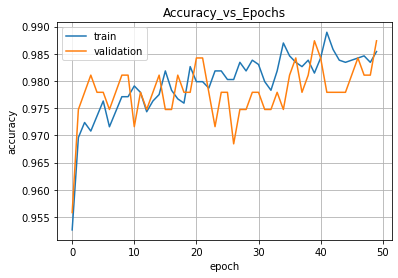

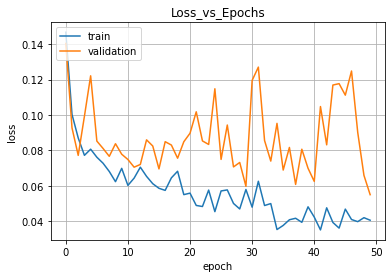

In [191]:
# Plot the training and validation accuracies vs. epochs for the latest loop iteration
fig = plt.figure()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Accuracy_vs_Epochs')
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# Save plot as PNG file
#fig.savefig('Accuracy_vs_Epochs.png')

# Plot the training and validation losses vs. epochs for the latest loop iteration
fig = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss_vs_Epochs')
plt.grid()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# Save plot as PNG file
#fig.savefig('Loss_vs_Epochs.png')

Confusion matrix, without normalization


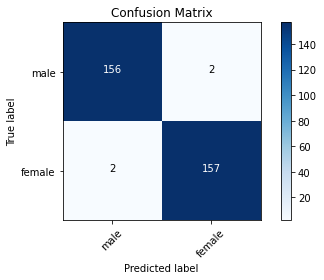

In [192]:
# Plot a confusion matrix
y_pred = model.predict(X_test_centered)

# Convert One Hot labels into integers
y_pred_int = np.argmax(y_pred, axis=1)

class_names = np.unique(y_test_onehot)

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred_int, labels=class_names)

pd.DataFrame(confmat, index=class_names, columns=class_names)

# Convert label array to list
class_names = list(class_names)

# Rename classes for Confusion Matrix
class_names[0] = 'male'
class_names[1] = 'female'


# Define function for plotting the Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
   # This function prints and plots the confusion matrix.
   # Normalization can be applied by setting `normalize=True`.
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

fig = plt.figure()
plot_confusion_matrix(confmat, class_names, title='Confusion Matrix')
plt.show()